Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [28]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/FINAL_USO (1).csv')

In [29]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [30]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
1717,2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,...,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


In [31]:
# number of rows and columns
gold_data.shape

(1718, 81)

In [32]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [33]:
# checking the number of missing values
gold_data.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [34]:
# getting the statistical measures of the data
gold_data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


Correlation:
1. Positive Correlation
2. Negative Correlation

In [35]:
correlation = gold_data.corr()

<ipython-input-35-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

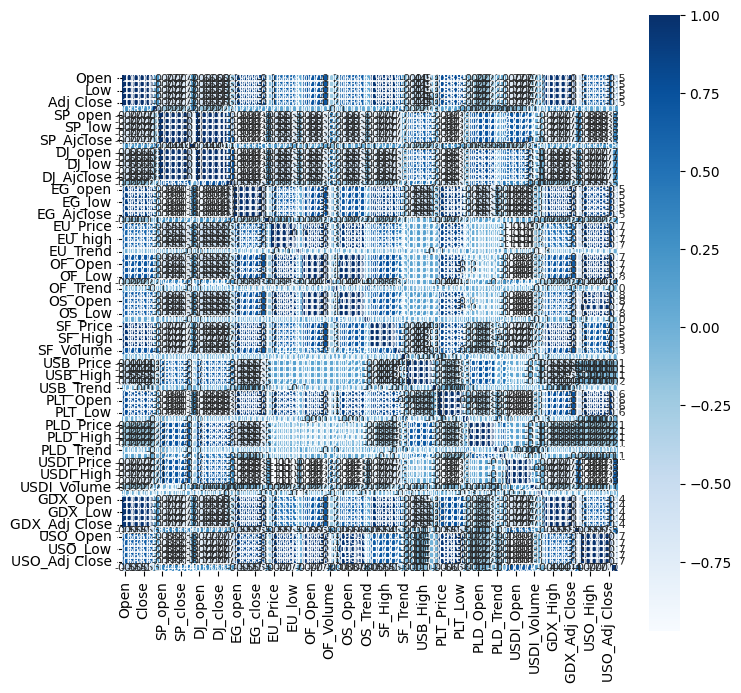

In [36]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [38]:
# correlation values of GLD
print(correlation['Open'])

Open             1.000000
High             0.999515
Low              0.999442
Close            0.998976
Adj Close        0.998976
                   ...   
USO_High         0.634864
USO_Low          0.634277
USO_Close        0.635138
USO_Adj Close    0.635138
USO_Volume      -0.455920
Name: Open, Length: 80, dtype: float64


<ipython-input-40-2c9d31ca993e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['Open'],color='red')


<Axes: xlabel='Open', ylabel='Density'>

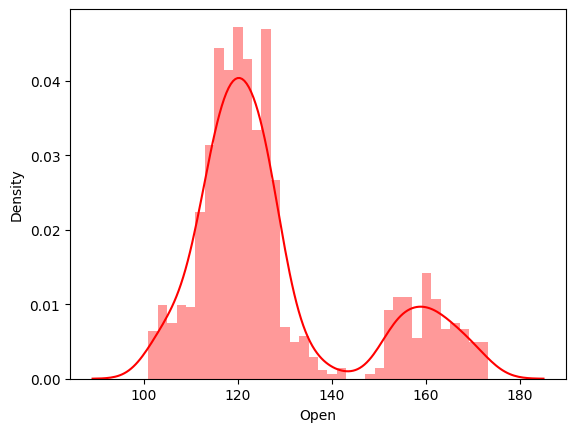

In [40]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['Open'],color='red')

Splitting the Features and Target

In [41]:
X = gold_data.drop(['Date','Open'],axis=1)
Y = gold_data['Open']

In [42]:
print(X)

            High         Low       Close   Adj Close    Volume     SP_open  \
0     154.949997  151.710007  152.330002  152.330002  21521900  123.029999   
1     155.369995  153.899994  155.229996  155.229996  18124300  122.230003   
2     155.860001  154.360001  154.869995  154.869995  12547200  122.059998   
3     157.429993  156.580002  156.979996  156.979996   9136300  122.180000   
4     157.529999  156.130005  157.160004  157.160004  11996100  123.930000   
...          ...         ...         ...         ...       ...         ...   
1713  120.139999  119.570000  120.019997  120.019997   9736400  239.039993   
1714  121.000000  119.570000  119.660004  119.660004  14293500  235.970001   
1715  120.900002  120.139999  120.570000  120.570000  11874400  242.570007   
1716  121.080002  120.720001  121.059998  121.059998   6864700  249.580002   
1717  121.260002  120.830002  121.250000  121.250000   8449400  249.559998   

         SP_high      SP_low    SP_close  SP_Ajclose  ...    GD

In [43]:
print(Y)

0       154.740005
1       154.309998
2       155.479996
3       156.820007
4       156.979996
           ...    
1713    119.570000
1714    120.620003
1715    120.570000
1716    120.800003
1717    120.980003
Name: Open, Length: 1718, dtype: float64


Splitting into Training data and Test Data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [45]:
regressor = RandomForestRegressor(n_estimators=100)

In [46]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [47]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [48]:
print(test_data_prediction)

[113.38050044 121.15170113 119.25469956 114.17549892 103.55539908
 114.8001999  126.6485002  124.53210035 128.43759881 120.03089886
 127.85849926 115.22280003 118.92840005 118.21290025 170.55119827
 118.25320044 114.44570038 115.93210006 124.29310053 121.32159931
 161.82640218 119.74930012 153.56229914 118.49810049 126.53449959
 156.65970178 156.56089867 127.00519944 118.86560041 120.54329968
 124.44660026 121.13040038 103.04959928 117.66629951 118.67929948
 120.46519997 155.65240036 120.46269898 117.11239991 163.11789971
 118.1446002  125.31140013 124.47440066 114.46829995 119.86049874
 122.69160043 161.67220208 119.81729903 113.56679941 135.49830225
 112.31330117 121.94839978 127.04159899 123.89569994 122.5040004
 154.66739861 110.94349952 125.60310033 121.97469967 125.45849974
 160.07380195 161.02110253 127.90350044 101.59699956 114.00029932
 162.17070072 157.60070198 113.5812001  120.7360007  123.78570047
 113.27490018 105.58600132 125.88559952 101.79100012 111.91499996
 159.377201

In [49]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9991276239412659


Compare the Actual Values and Predicted Values in a Plot

In [50]:
Y_test = list(Y_test)

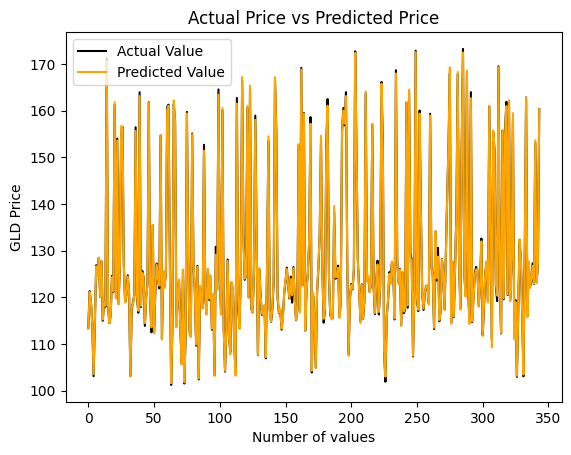

In [54]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()